In [76]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [77]:
import numpy as np
import pandas as pd
import matplotlib as matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams["figure.figsize"] = (20,10)

In [78]:
data = pd.read_csv("Bengaluru_House_Data.csv")
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [79]:
data.shape

(13320, 9)

In [80]:
data.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

### Now let us first examine our first feature that is "area_type".

### We will be printing the count of data samples in each of the categories of the area_type feature.

In [81]:
data.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

### Now we are here proceeding for a simple model and hence we will drop some of the features we think don't have any effect on the price, which is our target variable.

### Thus, we are going to drop 'area_type', 'society' and 'availability'. We will assume that these features will not be having any effect on our target variable.

In [82]:
drop_columns = ['area_type', 'availability', 'society']
df = data.drop(drop_columns, axis = 1)
df.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


# ***DATA CLEANING PROCESS***

* ##  Handling the null values.

In [83]:
df.isnull().sum(), df.shape

(location        1
 size           16
 total_sqft      0
 bath           73
 balcony       609
 price           0
 dtype: int64,
 (13320, 6))

### Since we have 13,320 rows we can safely drop the rows having null values. 

In [84]:
df2 = df.dropna()
df2.isnull().sum(), df2.shape

(location      0
 size          0
 total_sqft    0
 bath          0
 balcony       0
 price         0
 dtype: int64,
 (12710, 6))

### Now, if we see there are no NULL values which can be seen above. Also we see the size of the new dataset obtained after dropping the NULL values.

In [85]:
 df2.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


### Now if we observe the column 'size' we see that some values have values in 'x BHK' while some like 'x Bedroom'. Let us see how data entries in this column behave.

In [86]:
df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '3 Bedroom', '1 BHK', '1 RK',
       '4 BHK', '1 Bedroom', '2 Bedroom', '6 Bedroom', '8 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '11 Bedroom', '43 Bedroom',
       '14 BHK', '8 BHK', '12 Bedroom', '10 Bedroom', '13 BHK'],
      dtype=object)

### So in order to tackle this problem, we will be creating a new column called 'bhk', which will show how many bedrooms are present in the house.

In [87]:
df2['bhk'] = df2['size'].apply(lambda x: (int)(x.split(' ')[0]))

C:\Users\Prashant Mishra\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### Now we can see that a new column has been added in our dataset.

In [88]:
df2.head()

,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,1.0,51.00,2


### Also we can drop the column 'size' as it is of no use to us right now.

In [89]:
df3 = df2.drop(['size'], axis =1)
df3.head()

,location,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600,5.0,3.0,120.00,4
2,Uttarahalli,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,1521,3.0,1.0,95.00,3
4,Kothanur,1200,2.0,1.0,51.00,2


In [90]:
df3['bhk'].unique()

array([ 2,  4,  3,  1,  6,  8,  7,  5, 11,  9, 27, 43, 14, 12, 10, 13],
      dtype=int64)

### We can see that some of the estate have as many as 43 bedrooms in it which clearly indicates it as an outlier. Let us observe more about these type of outliers.

In [91]:
df3[df3.bhk > 20]

,location,total_sqft,bath,balcony,price,bhk
1718,2Electronic City Phase II,8000,27.0,0.0,230.0,27
4684,Munnekollal,2400,40.0,0.0,660.0,43


### As we can see that the estate with 43 bedrooms has an area of 2400 sq. ft. which is absurd.

### To look more into these type of errors, let us explore the column 'total_sqft' into detail.

In [92]:
df3['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

### We can see that sometimes we don't get a single value but a range of values like '1133 - 1384' which can be seen above.

### So let's remove these anomalies by taking the mean of the range and also check for other abnormalities. We will do that by checking whether the data entry can be converted into float type or not.

In [93]:
def isFloat(x):
    try:
        float(x)
    except:
        return False
    return True
    

In [94]:
df3[~( df3['total_sqft'].apply(isFloat) )].head(15)

,location,total_sqft,bath,balcony,price,bhk
30,Yelahanka,2100 - 2850,4.0,0.0,186.000,4
122,Hebbal,3067 - 8156,4.0,0.0,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.0,0.0,54.005,2
165,Sarjapur,1145 - 1340,2.0,0.0,43.490,2
188,KR Puram,1015 - 1540,2.0,0.0,56.800,2
410,Kengeri,34.46Sq. Meter,1.0,0.0,18.500,1
549,Hennur Road,1195 - 1440,2.0,0.0,63.770,2
661,Yelahanka,1120 - 1145,2.0,0.0,48.130,2
672,Bettahalsoor,3090 - 5002,4.0,0.0,445.000,4
772,Banashankari Stage VI,1160 - 1195,2.0,0.0,59.935,2


### We can see apart from the range we also have other types of data entries, such as 34.46Sq. Meter in row 410 and so on.

### So in order to handle these non uniformities in data, we will be taking the mean if the entry is of range type and for any other type of entry in this column we will just simply drop the corresponding row.

In [95]:
def convertSqftToNum(x):
    values = x.split('-')
    if len(values)==2:
        return (float(values[0])+float(values[1]))/2
    try:
        return float(x)
    except:
        return None
    

In [96]:
df4 = df3.copy()
df4['total_sqft'] = df4['total_sqft'].apply(convertSqftToNum)
df4.head(10)

,location,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3
4,Kothanur,1200.0,2.0,1.0,51.00,2
5,Whitefield,1170.0,2.0,1.0,38.00,2
8,Marathahalli,1310.0,3.0,1.0,63.25,3
10,Whitefield,1800.0,2.0,2.0,70.00,3
11,Whitefield,2785.0,5.0,3.0,295.00,4
12,7th Phase JP Nagar,1000.0,2.0,1.0,38.00,2


#  ***FEATURE ENGINEERING***

In [97]:
df5 = df4.copy()

### Now we all know that in the real estate business, price per sq ft of the estate is of utmost significance.

### Hence, we will be adding a new feature 'price_per_sqft' to observe our dataset into more details and also it will help us in cleansing our dataset of outliers and other anomalies.

In [98]:
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']

### Since our price was given in lakhs, thus we have multiplied 100000 in the price of each state, which can be seen above.

In [99]:
df5.head()

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,1.0,51.00,2,4250.000000


### Now let us explore the column 'location' and see how many unique locations are present in our dataset and how many estates are in a particular location.

In [100]:
len(df5.location.unique())

1265

### This is a very large number for locations. Now we convert the textual data in numerical by using 'ONE-HOT ENCODING'.

### But if we will consider all the locations,then we will be having more than 1250 columns, which will not be convenient. This increases the dimensionality too much, and hence we need to reduce the dimensions.

### So what we will do is that we will define a 'other' column, which will include all those locations where the data entries are only '1' and '2'.

In [101]:
#Let us first remove the leading white spaces from the location names.
df5.location = df5.location.apply(lambda x: x.strip())

location_statistics = df5.groupby('location')['location'].agg('count').sort_values(ascending = False)
location_statistics

location
Whitefield                              515
Sarjapur  Road                          372
Electronic City                         302
Kanakpura Road                          261
Thanisandra                             234
                                       ... 
Kodanda Reddy Layout                      1
Kirloskar layout, Basaveshwarnagar        1
Kengeri Satellite Town Stage II           1
Kengeri Satellite Town KHB Apartment      1
1 Annasandrapalya                         1
Name: location, Length: 1254, dtype: int64

In [102]:
location_statistics[location_statistics<10]

location
5th Block Hbr Layout                    9
Kamakshipalya                           9
Vignana Nagar                           9
Lingarajapuram                          9
Ejipura                                 9
                                       ..
Kodanda Reddy Layout                    1
Kirloskar layout, Basaveshwarnagar      1
Kengeri Satellite Town Stage II         1
Kengeri Satellite Town KHB Apartment    1
1 Annasandrapalya                       1
Name: location, Length: 1007, dtype: int64

In [103]:
len(location_statistics[location_statistics<10])

1007

In [104]:
location_less_than_10 = location_statistics[location_statistics<10]
len(df5.location.unique())

1254

In [105]:
df5.location = df5.location.apply(lambda x: 'other' if x in location_less_than_10 else x)
len(df5.location.unique())

248

In [106]:
df5.head(20)

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,1.0,51.00,2,4250.000000
5,Whitefield,1170.0,2.0,1.0,38.00,2,3247.863248
8,Marathahalli,1310.0,3.0,1.0,63.25,3,4828.244275
10,Whitefield,1800.0,2.0,2.0,70.00,3,3888.888889
11,Whitefield,2785.0,5.0,3.0,295.00,4,10592.459605
12,7th Phase JP Nagar,1000.0,2.0,1.0,38.00,2,3800.000000


### Now let us look at the columns 'bath' and 'balcony' and filter out the anomalies related to them.

In [107]:
df5.groupby('balcony')['balcony'].agg('count')

balcony
0.0    1029
1.0    4897
2.0    5112
3.0    1672
Name: balcony, dtype: int64

In [108]:
df5.shape

(12710, 7)

In [109]:

df5[(df5.total_sqft/df.balcony < 300)]

C:\Users\Prashant Mishra\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
70,other,500.0,3.0,2.0,100.0,3,20000.000000
89,Rajaji Nagar,710.0,6.0,3.0,160.0,6,22535.211268
119,Hennur Road,276.0,3.0,3.0,23.0,2,8333.333333
349,other,11.0,3.0,2.0,74.0,3,672727.272727
482,Kenchenahalli,500.0,3.0,2.0,65.0,5,13000.000000
...,...,...,...,...,...,...,...
12943,Vishwapriya Layout,890.0,2.0,3.0,37.0,2,4157.303371
12973,other,600.0,3.0,3.0,86.0,3,14333.333333
13216,other,250.0,2.0,2.0,40.0,1,16000.000000
13303,Vidyaranyapura,774.0,5.0,3.0,70.0,5,9043.927649


In [110]:

df6 = df5[~(df5.total_sqft/df5.balcony < 300)]
df6.shape

(12641, 7)

In [111]:
df6[df6.total_sqft/df5.bhk < 300]

C:\Users\Prashant Mishra\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
58,Murugeshpalya,1407.0,4.0,1.0,150.0,6,10660.980810
68,Devarachikkanahalli,1350.0,7.0,0.0,85.0,8,6296.296296
78,Kaval Byrasandra,460.0,1.0,0.0,22.0,2,4782.608696
129,Vishwapriya Layout,950.0,7.0,0.0,115.0,7,12105.263158
170,other,1300.0,6.0,0.0,99.0,6,7615.384615
...,...,...,...,...,...,...,...
13198,other,1200.0,8.0,0.0,140.0,8,11666.666667
13219,Laggere,1590.0,9.0,3.0,132.0,7,8301.886792
13221,other,1178.0,9.0,1.0,75.0,9,6366.723260
13281,Margondanahalli,1375.0,5.0,1.0,125.0,5,9090.909091


In [112]:
df7 = df6[~(df6.total_sqft/df5.bhk < 300)]
df7.shape

C:\Users\Prashant Mishra\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


(12040, 7)

### After balcony and bath, let us now look at 'price_per_sqft' in detail. 

In [113]:
df7.price_per_sqft.describe()

count     11998.000000
mean       6196.738808
std        3918.782840
min         267.829813
25%        4199.247879
50%        5252.421226
75%        6821.174175
max      176470.588235
Name: price_per_sqft, dtype: float64

### So we can see that the minimum and the maximum values for the column 'price_per_sqft' can be safely classified as outliers.

### Therefore we will be removing these extreme values on the basis of mean and standard deviation.

### Now mean and standard deviation will be calculated per location as some locations will have low prices while some will have higher prices.

In [114]:
def remove_extremes(df):
    df_out = pd.DataFrame()
    for key, dff in df.groupby('location'):
        m = np.mean(dff.price_per_sqft)
        sd = np.std(dff.price_per_sqft)
        reduced_df = dff[(dff.price_per_sqft>(m-sd)) & (dff.price_per_sqft<=(m+sd))]
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)
    return df_out
    
df8 = remove_extremes(df7)
df8.shape

(9798, 7)

In [115]:
df8.head()

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4,15017.543860
1,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3,11901.840491
2,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3,12533.333333
3,1st Block Jayanagar,1200.0,2.0,0.0,130.0,3,10833.333333
4,1st Block Jayanagar,1235.0,2.0,2.0,148.0,2,11983.805668


In [116]:
df8.groupby('location')['location'].describe()


,count,unique,top,freq
location,,,,
1st Block Jayanagar,7,1,1st Block Jayanagar,7
1st Block Koramangala,5,1,1st Block Koramangala,5
1st Phase JP Nagar,17,1,1st Phase JP Nagar,17
2nd Phase Judicial Layout,8,1,2nd Phase Judicial Layout,8
2nd Stage Nagarbhavi,6,1,2nd Stage Nagarbhavi,6
...,...,...,...,...
Yelahanka,167,1,Yelahanka,167
Yelahanka New Town,32,1,Yelahanka New Town,32
Yelenahalli,9,1,Yelenahalli,9


### Also if we look into our dataset we will find that some of the 2 bhk estates have more price than 3 bhk estates where total sq_ft area for both of them is same. It is a anomaly which we need to fix.


In [117]:
pd.concat([df8[df8.bhk==2], df8[df8.bhk==3]], ignore_index= True)[35:70]
#df6[df6.total_sqft/df5.bhk < 300]

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
35,6th Phase JP Nagar,1216.0,2.0,2.0,60.00,2,4934.210526
36,6th Phase JP Nagar,1192.0,2.0,3.0,75.00,2,6291.946309
37,6th Phase JP Nagar,1280.0,2.0,1.0,88.00,2,6875.000000
38,7th Phase JP Nagar,1080.0,2.0,2.0,72.00,2,6666.666667
39,7th Phase JP Nagar,1270.0,2.0,2.0,93.00,2,7322.834646
40,7th Phase JP Nagar,1245.0,2.0,1.0,94.00,2,7550.200803
41,7th Phase JP Nagar,1175.0,2.0,1.0,82.00,2,6978.723404
42,7th Phase JP Nagar,1050.0,2.0,1.0,71.00,2,6761.904762
43,7th Phase JP Nagar,1100.0,2.0,0.0,46.00,2,4181.818182
44,7th Phase JP Nagar,918.0,2.0,1.0,50.49,2,5500.000000


### In the index 63 and 64, 2 bhk has a price of 65 lakhs while 3 bhk has a price of 60 lakhs and total area sq_ft of both the estates are almost same.

### Therefore, we need to improvise again and remove such anomalies from our dataset. But first let's look at a scatter plot per location based on this ambiguity to identify which points are to be removed.

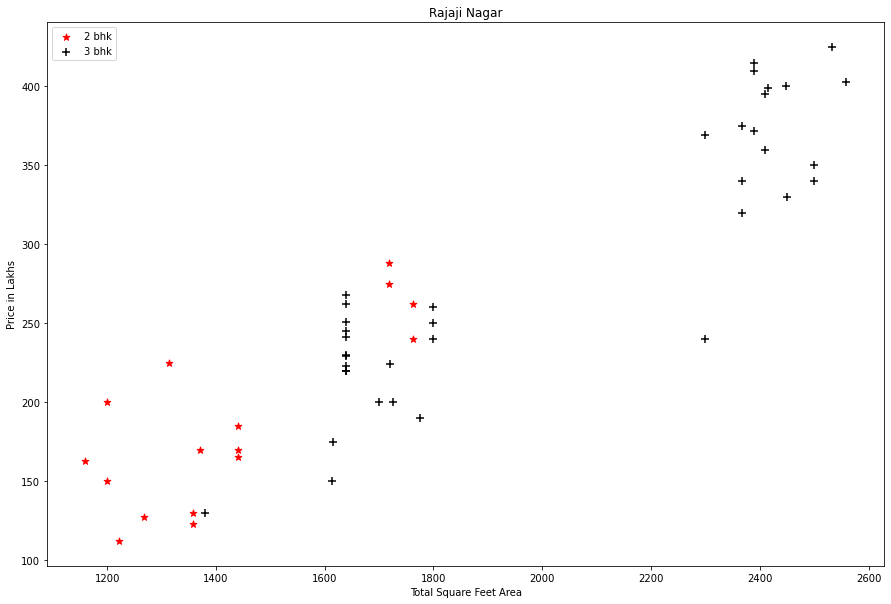

In [118]:
def plot_scatter_chart(df, location):
    bhk2 = df[(df.location == location) & (df.bhk == 2)]
    bhk3 = df[(df.location == location) & (df.bhk == 3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft, bhk2.price, marker='*', color='red', label='2 bhk', s=50)
    plt.scatter(bhk3.total_sqft, bhk3.price, marker='+', color='black', label='3 bhk', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price in Lakhs")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df8,"Rajaji Nagar")

### We can see from the above graph that price of 2bhk estate is higher than 3bhk when area is about 1700 sq ft.

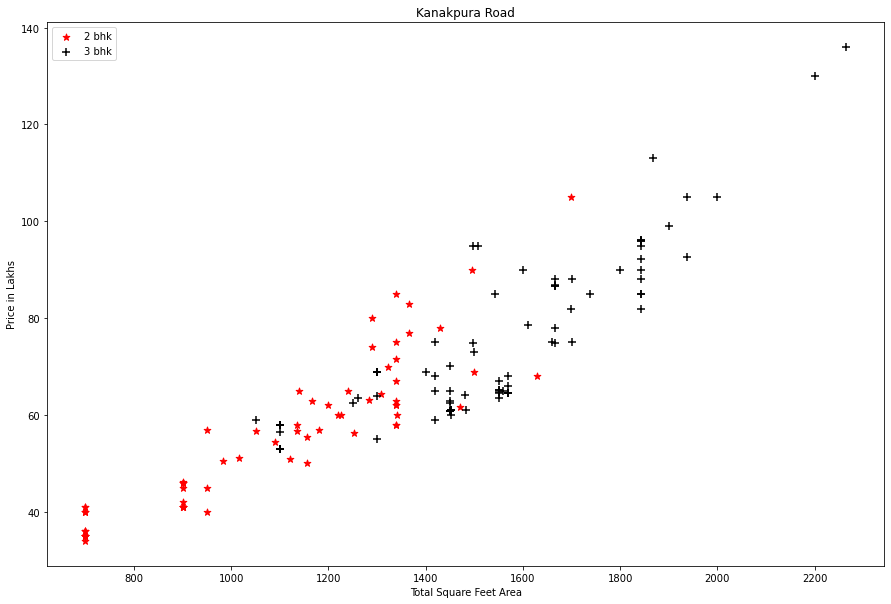

In [119]:
plot_scatter_chart(df8,"Kanakpura Road")

In [120]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats={}
        
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
            
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    
    return df.drop(exclude_indices, axis='index')


df9 = remove_bhk_outliers(df8)
df9.shape
            

(7056, 7)

### Now plotting the same scatter plot which we plotted above but this time with the new dataset.

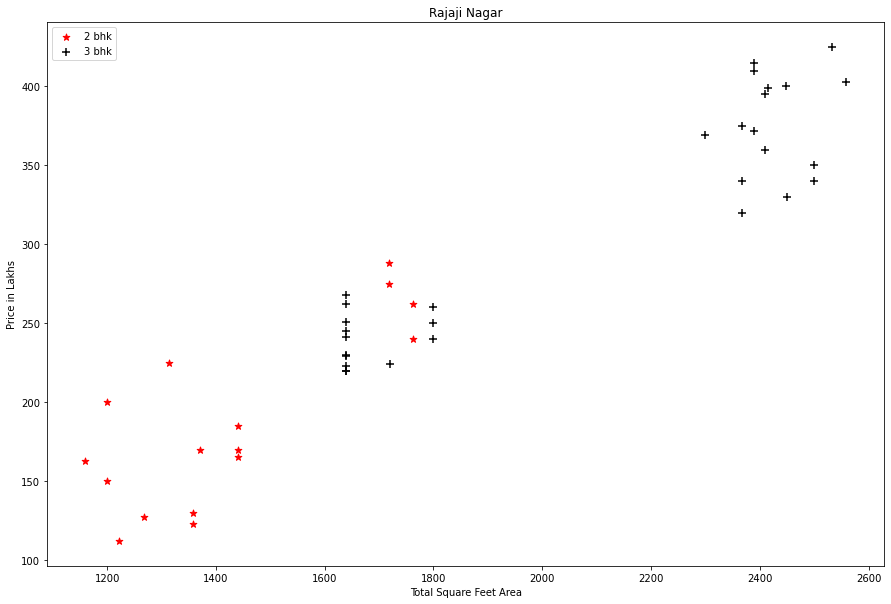

In [121]:
plot_scatter_chart(df9,"Rajaji Nagar")

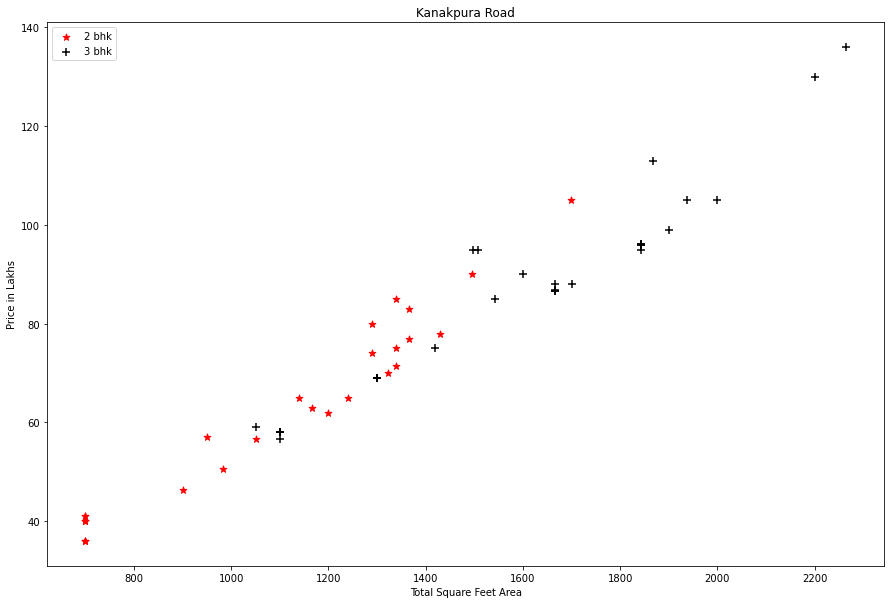

In [122]:
plot_scatter_chart(df9,"Kanakpura Road")

### We can see that with the new dataset the anomalies have reduced to a very minimal value.

### Now let us plot a histogram to observe the number of estates in a particular range of price per sq ft.

Text(0, 0.5, 'Count')

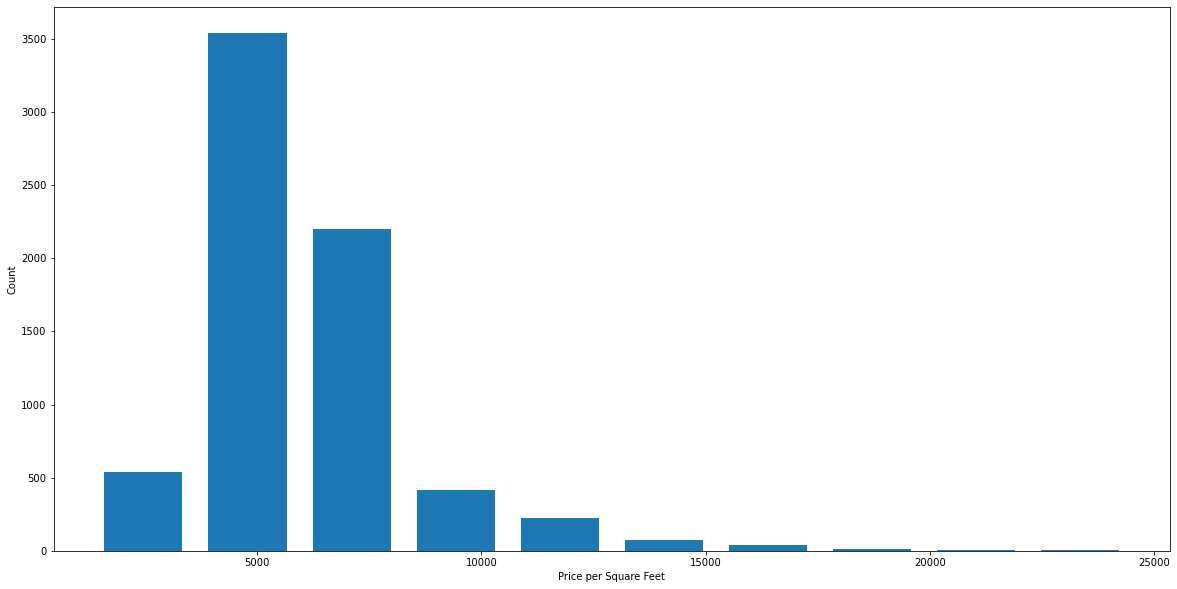

In [123]:
matplotlib.rcParams['figure.figsize'] = (20,10)
plt.hist(df9.price_per_sqft, rwidth = 0.75)
plt.xlabel('Price per Square Feet')
plt.ylabel('Count')

### Also let us explore the bathroom feature or column 'bath' in our dataset.

In [124]:
df9.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 13.])

In [125]:
df9[df9.bath>=10]

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
9245,other,5425.0,13.0,0.0,275.0,13,5069.124424


Text(0, 0.5, 'Count')

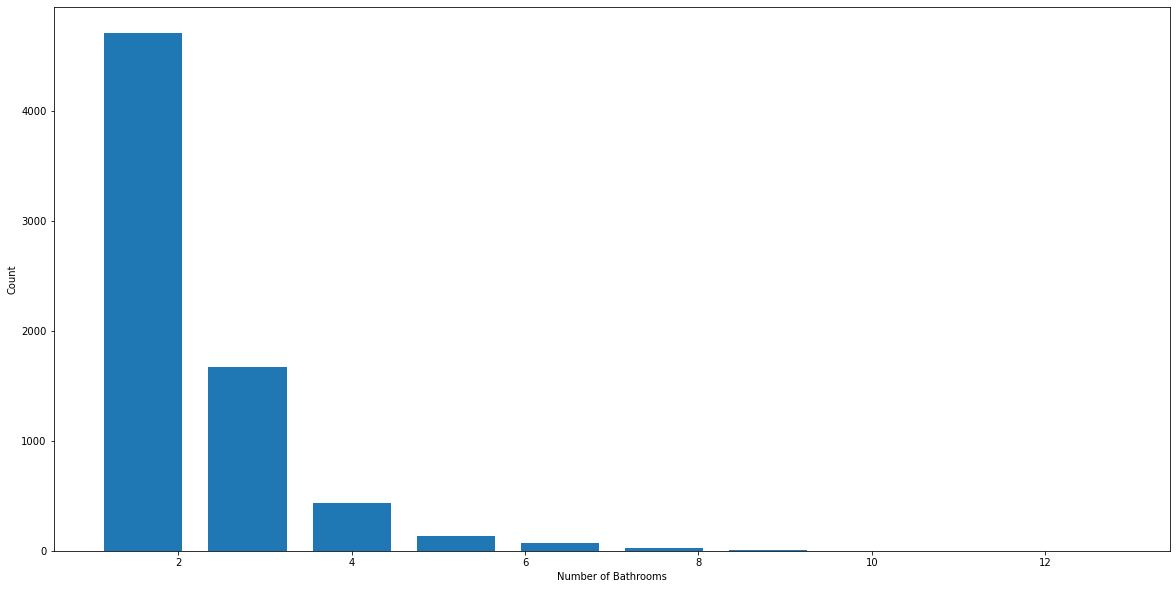

In [126]:
plt.hist(df9.bath, rwidth=0.75)
plt.xlabel('Number of Bathrooms')
plt.ylabel('Count')

In [127]:
df9[df9.bath>df9.bhk+2]

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
1551,Chikkabanavar,2460.0,7.0,2.0,80.0,4,3252.032520
6498,Thanisandra,1806.0,6.0,2.0,116.0,3,6423.034330
8122,other,11338.0,9.0,1.0,1000.0,6,8819.897689


In [128]:
df10 = df9[df9.bath<df9.bhk+2]
df10.shape

(6989, 7)

### Now we can drop our column 'price_per_sqft' feature as we have exhausted its use. We used it to detect the outliers and did some data cleaning with its help. Now the column has no use for us and hence we can drop it.

In [129]:
df11 = df10.drop(['price_per_sqft'], axis = 'columns')
df11.head(), df11.shape

(              location  total_sqft  bath  balcony  price  bhk
 0  1st Block Jayanagar      2850.0   4.0      1.0  428.0    4
 1  1st Block Jayanagar      1630.0   3.0      2.0  194.0    3
 2  1st Block Jayanagar      1875.0   2.0      3.0  235.0    3
 3  1st Block Jayanagar      1200.0   2.0      0.0  130.0    3
 4  1st Block Jayanagar      1235.0   2.0      2.0  148.0    2,
 (6989, 6))

### Also we can see that the 'location' column of our dataset has a textual representaion and since it is categorical we can convert it into a numerical column.

### One of the ways to convert a text column into a numerical column is 'ONE-HOT ENCODING'. It is also called dummies method.

In [130]:
dummy = pd.get_dummies(df11.location)
dummy.head(10)

,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [131]:
df12 = pd.concat([df11, dummy], axis='columns')
df12.head(10)

,location,total_sqft,bath,balcony,price,bhk,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,0.0,130.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,2.0,148.0,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1st Block Jayanagar,2750.0,4.0,0.0,413.0,4,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1st Block Jayanagar,2450.0,4.0,2.0,368.0,4,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1st Block Koramangala,1415.0,2.0,3.0,110.0,2,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1st Block Koramangala,860.0,2.0,2.0,65.5,2,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1st Block Koramangala,3000.0,3.0,3.0,300.0,4,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [132]:
df13 = df12.drop(['other'], axis = 1)
df13.head(10)

,location,total_sqft,bath,balcony,price,bhk,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,0.0,130.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,2.0,148.0,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1st Block Jayanagar,2750.0,4.0,0.0,413.0,4,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1st Block Jayanagar,2450.0,4.0,2.0,368.0,4,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1st Block Koramangala,1415.0,2.0,3.0,110.0,2,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1st Block Koramangala,860.0,2.0,2.0,65.5,2,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1st Block Koramangala,3000.0,3.0,3.0,300.0,4,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [133]:
df14 = df13.drop(['location'], axis = 1)
df14.head()


,total_sqft,bath,balcony,price,bhk,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,1.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,2.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,0.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [134]:
df14.shape

(6989, 252)

In [135]:
X = df14.drop(['price'], axis = 'columns')
X.head()

,total_sqft,bath,balcony,bhk,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,1.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,2.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,0.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [136]:
y = df13.price
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [137]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

### Let us first try running our model on **Linear Regression algorithm** and see how the results pan out.

In [138]:
from sklearn.linear_model import LinearRegression
lrm = LinearRegression()
lrm.fit(X_train, y_train)
lrm.score(X_test, y_test)

0.8653083292003624

## Typically, one should try a couple of different models with different parameters to come up with the best optimal model for prediction of price.

### And we are also going to do the same.

## We will first use a k-fold cross validation method for prediction.

In [139]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 0)
cross_val_score(LinearRegression(), X, y, cv = cv)

array([0.76764285, 0.81287289, 0.80604503, 0.80445659, 0.85353625])

### We can see that the majority of the time, we get a score of more than 80%.

### We also see that when we run Linear Regression on five full cross validation, we get a decent score. But we should also try other regression techniques.

## So we will be using Grid search CV method for using other regression techniques. It's an API from sklearn which can be used to run our model on different regressors and get the optimal algorithm for prediction.

In [140]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_optimum_model(X,y):
    algos = {
        'linear regression' : {
            'model' : LinearRegression(),
            'params' : {
                'normalize' : [True, False]
            }
        },
        
        'lasso': {
            'model' : Lasso(),
            'params' : {
                'alpha' : [1, 2],
                'selection' : ['random', 'cyclic']
            }
        },
        
        'decision_tree' : {
            'model' : DecisionTreeRegressor(),
            'params' : {
                'criterion' : ['mse', 'friedman_mse'],
                'splitter' : ['best', 'random']
            }
        }
        
    }
    
    scores = []
    cv  = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv = cv, return_train_score = False)
        gs.fit(X,y)
        
        scores.append(
            {
            'model' : algo_name,
            'best_score' : gs.best_score_,
            'best_params' : gs.best_params_
        }
        )
        
    return pd.DataFrame(scores, columns = ['model', 'best_score', 'best_params'])



find_optimum_model(X,y)        
        

,model,best_score,best_params
0,linear regression,0.808911,{'normalize': True}
1,lasso,0.658373,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.689806,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


## Since we can see from the above comparison, linear regression is giving the best and optimum results. So we will use linear regression only for the prediction of price for unknown data.

In [141]:
def predict(location, sqft, bath, balcony, bhk):
    location_index = np.where(X.columns == location)[0][0]
    
    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = balcony
    x[3] = bhk
    
    if location_index >= 0:
        x[location_index] = 1
        
    return lrm.predict([x])[0]

In [142]:
predict('1st Phase JP Nagar', 1200, 2, 1, 3)

103.7172135082986

In [143]:
predict('1st Phase JP Nagar', 1200, 3, 1, 4)

105.57260010731483

In [144]:
predict('Indira Nagar', 1200, 2, 1, 3)

197.67961946630606

In [145]:
predict('Indira Nagar', 1200, 3, 1, 4)

199.53500606532225

# Exporting our model

In [146]:
import pickle
with open('Bangalore_House_Prices_Model.pickle', 'wb') as f:
    pickle.dump(lrm, f)

In [147]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json", "w") as f:
    f.write(json.dumps(columns))